In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sklearn.datasets

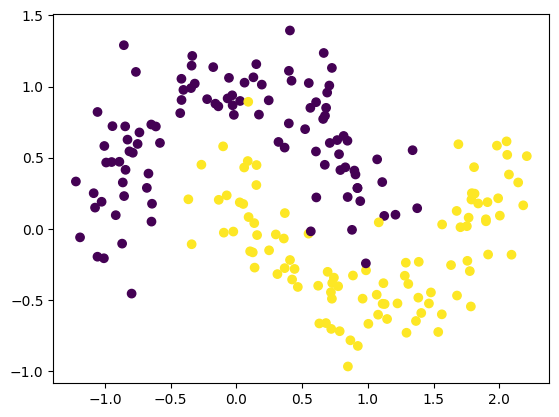

In [2]:
x,y = sklearn.datasets.make_moons(200,noise=0.20)
plt.scatter(x[:,0],x[:,1],c=y)

In [3]:
print(x.shape,y.shape)

(200, 2) (200,)


In [4]:
input_neurons = 2
output_neurons = 2
samples = x.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

we are going to build a simple neural network with 2 input, 3 hidden and 2 output neurons !!

our weight matrix is just a matrix with no. of rows as the no. of neurons in it's previous layer
and no. of columns as the no. of neurons in the layer after it !!

so we are multiplying a 200x2 matrix with 2x3 matrix which will result in 200x3 matrix (which is the input for next layer)
now, 200x3 matrix in multiplied by weight matrix between second and third layer i.e. 3x2 matrix so it finally becomes 200x2 
matrix which is our output matrix

In [5]:
model_dict = {}
def retrieve(md) :
    w1 = md["w1"]
    w2 = md["w2"]
    b1 = md["b1"]
    b2 = md["b2"]
    return w1,b1,w2,b2

In [6]:
def forward(x,model_dict) : 
    w1,b1,w2,b2 = retrieve(model_dict)
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    exp = np.exp(z2)
    softmax = exp/np.sum(exp,axis=1,keepdims=True)
    return z1,a1,softmax

In [7]:
def loss(softmax,y,model_dict) : 
    w1,b1,w2,b2 = retrieve(model_dict)
    N = y.shape[0]
    correct_probs = softmax[np.arange(N), y]
    data_loss = np.mean(-np.log(correct_probs + 1e-9))
    reg_loss = (lambda_reg / 2) * (np.sum(w1*w1) + np.sum(w2*w2))
    return data_loss + reg_loss

In [8]:
def predict(x,model_dict) : 
    w1,b1,w2,b2 = retrieve(model_dict)
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    exp = np.exp(z2)
    softmax = exp/np.sum(exp,axis=1,keepdims=True)
    return np.argmax(softmax,axis=1)

In [9]:
def backprop(x,y,model_dict,epochs) : 
    for e in range(epochs) :
        w1,b1,w2,b2 = retrieve(model_dict)
        z1,a1,probs = forward(x,model_dict)

        # calculating deltas (i.e. backprop equations) !!
        delta3 = np.copy(probs)
        delta3[np.arange(x.shape[0]),y] -= 1 # delta3 = probs - 1 from correct index while preserving probs !!
        dw2 = (a1.T).dot(delta3) # a1.T:(3,200) dot delta3:(200,2) ---> (3,2) !!
        db2 = np.sum(delta3, axis = 0, keepdims=True)
        delta2 = delta3.dot(w2.T)*(1-a1**2)
        dw1 = (x.T).dot(delta2)
        db1 = np.sum(delta2, axis=0)
        
        # adding L2 regularization terms 
        dw2 += lambda_reg*np.sum(w2)
        dw1 += lambda_reg*np.sum(w1)
        
        # updating w and b !
        w1 += -learning_rate*dw1
        b1 += -learning_rate*db1
        w2 += -learning_rate*dw2
        b2 += -learning_rate*db2
        # update model dict !
        model_dict = {"w1" : w1, "b1" : b1, "w2" : w2, "b2" : b2}
        # print loss every 50 epoch !
        if e%50 == 0 :
            print(f"loss at {e}/{epochs} epoch is : {loss(probs,y,model_dict):.3f}")
    return model_dict 

In [10]:
def init_network(input_dim,hidden_dim,output_dim) :
    model = {}
    # Xavier initialization !
    w1 = np.random.randn(input_dim,hidden_dim)/np.sqrt(input_dim)
    b1 = np.zeros((1,hidden_dim))
    w2 = np.random.randn(hidden_dim,output_dim)/np.sqrt(hidden_dim)
    b2 = np.zeros((1,output_dim))
    model["w1"] = w1
    model["w2"] = w2
    model["b1"] = b1
    model["b2"] = b2
    return model

In [11]:
model_dict = init_network(input_dim=input_neurons,hidden_dim=3,output_dim=output_neurons)
model = backprop(x,y,model_dict,1500)

loss at 0/1500 epoch is : 0.801
loss at 50/1500 epoch is : 0.390
loss at 100/1500 epoch is : 0.350
loss at 150/1500 epoch is : 0.349
loss at 200/1500 epoch is : 0.349
loss at 250/1500 epoch is : 0.349
loss at 300/1500 epoch is : 0.349
loss at 350/1500 epoch is : 0.349
loss at 400/1500 epoch is : 0.349
loss at 450/1500 epoch is : 0.350
loss at 500/1500 epoch is : 0.350
loss at 550/1500 epoch is : 0.350
loss at 600/1500 epoch is : 0.350
loss at 650/1500 epoch is : 0.350
loss at 700/1500 epoch is : 0.350
loss at 750/1500 epoch is : 0.350
loss at 800/1500 epoch is : 0.350
loss at 850/1500 epoch is : 0.351
loss at 900/1500 epoch is : 0.351
loss at 950/1500 epoch is : 0.351
loss at 1000/1500 epoch is : 0.351
loss at 1050/1500 epoch is : 0.352
loss at 1100/1500 epoch is : 0.352
loss at 1150/1500 epoch is : 0.352
loss at 1200/1500 epoch is : 0.352
loss at 1250/1500 epoch is : 0.353
loss at 1300/1500 epoch is : 0.353
loss at 1350/1500 epoch is : 0.353
loss at 1400/1500 epoch is : 0.354
loss at 